<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

## Машинное обучение 2
### Семинар 7. Гауссовские процессы

<br />
<br />
31 марта 2022

In [1]:
import torch
import gpytorch
import numpy as np

import matplotlib.pyplot as plt

from gpytorch.kernels import MaternKernel, RBFKernel


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

### Разные ковариационные функции

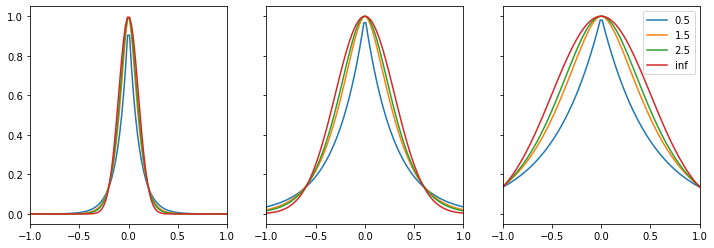

In [3]:
nus = [0.5, 1.5, 2.5, np.inf]
rhos = [0.1, 0.3, 0.5]

n_test = 100
x_test = torch.linspace(-1, 1, n_test).reshape(-1, 1)
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12, 4))
with torch.no_grad():
    for i, nu in enumerate(nus):
        for j, rho in enumerate(rhos):
            ax = axs[j]
            if np.isinf(nu):
                kernel = RBFKernel()
                kernel.lengthscale = rho
            else:
                kernel = MaternKernel(nu=nu) #, lengthscale=rho)
                kernel.lengthscale = rho
            K = kernel(torch.zeros(1, 1), x_test).evaluate() # + 1e-7*torch.ones(100)
            
            ax.plot(x_test, K.T, label=f'{nu}')
            ax.set_xlim(-1, 1)
            
plt.legend()

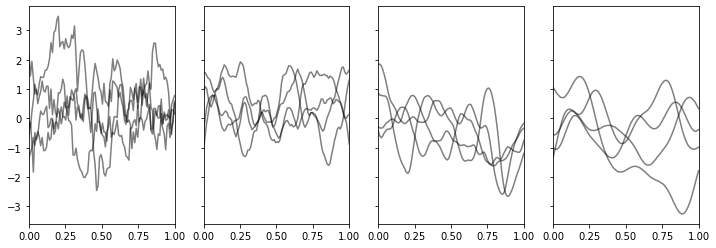

In [4]:
nus = [0.5, 1.5, 2.5, np.inf]
rho = 0.1

n_test = 100

x_test = torch.linspace(0, 1, n_test).reshape(-1, 1)
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(12, 4))
with torch.no_grad():
    for i, nu in enumerate(nus):
        ax = axs[i]
        if np.isinf(nu):
            kernel = RBFKernel()
            kernel.lengthscale = rho
        else:
            kernel = MaternKernel(nu=nu)
            kernel.lengthscale = rho
            
        K = kernel(x_test, x_test).evaluate()
        
        try:
            chol = torch.linalg.cholesky(K)
        except RuntimeError:
            K += 1e-5 * torch.eye(n_test)
            chol = torch.linalg.cholesky(K)
        
        u = torch.randn(n_test, 4)
        samples = torch.zeros(n_test, 4) + chol @ u

        ax.plot(x_test, samples, c='k', alpha=0.5)
        ax.set_xlim(0, 1)

In [5]:
from gpytorch.kernels import (
    LinearKernel, 
    CosineKernel,
    PeriodicKernel,
    PiecewisePolynomialKernel,
    SpectralMixtureKernel,
    RQKernel,
    ScaleKernel
)

In [6]:
kernels = [LinearKernel(), 
           CosineKernel(), 
           PeriodicKernel(), 
           PiecewisePolynomialKernel(), 
           SpectralMixtureKernel(num_mixtures=3)]

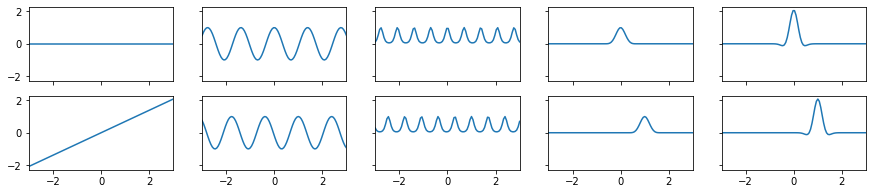

In [7]:
n_test = 100
x_test = torch.linspace(-3, 3, n_test).reshape(-1, 1)

fig, axs = plt.subplots(nrows=2, ncols=len(kernels), sharex=True, sharey=True, figsize=(3*len(kernels), 3))
for i, kernel in enumerate(kernels):
    ax = axs[0, i]
    with torch.no_grad():
        K = kernel(torch.zeros(1, 1), x_test).evaluate()
    ax.plot(x_test, K.ravel(), label=f'{nu}')
    ax.set_xlim(0, 3)
    
    ax = axs[1, i]
    with torch.no_grad():
        K = kernel(torch.ones(1, 1), x_test).evaluate()
    ax.plot(x_test, K.ravel(), label=f'{nu}')
    ax.set_xlim(-3, 3)

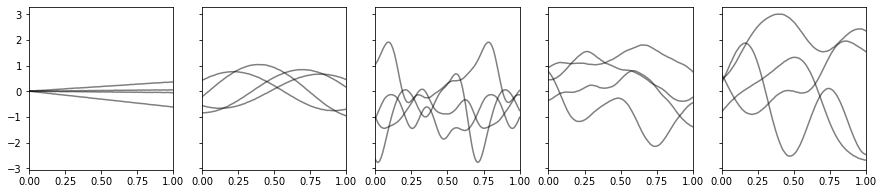

In [8]:
nus = [0.5, 1.5, 2.5, np.inf]
rho = 0.1

n_test = 100

x_test = torch.linspace(0, 1, n_test).reshape(-1, 1)
fig, axs = plt.subplots(nrows=1, ncols=len(kernels), sharey=True, figsize=(3*len(kernels), 3))
with torch.no_grad():
    for i, kernel in enumerate(kernels):
        ax = axs[i]
        
        K = kernel(x_test, x_test).evaluate()
        
        try:
            chol = torch.linalg.cholesky(K)
        except RuntimeError:
            K += 1e-5 * torch.eye(n_test)
            chol = torch.linalg.cholesky(K)
        
        u = torch.randn(n_test, 4)
        samples = torch.zeros(n_test, 4) + chol @ u

        ax.plot(x_test, samples, c='k', alpha=0.5)
        ax.set_xlim(0, 1)

Более внимательно посмотрим на периодическое ядро.

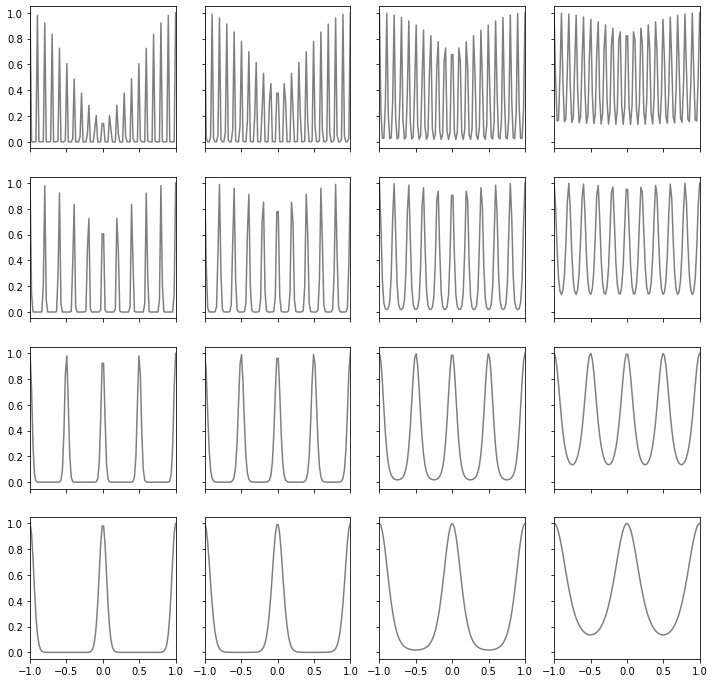

In [9]:
plens = [0.1, 0.2, 0.5, 1.0]
rhos = [0.1, 0.2, 0.5, 1.0]

n_test = 100

x_test = torch.linspace(-1, 1, n_test).reshape(-1, 1)
fig, axs = plt.subplots(nrows=len(plens), ncols=len(rhos), sharex=True, sharey=True, figsize=(3*len(plens), 3*len(rhos)))
with torch.no_grad():
    for i, plen in enumerate(plens):
        for j, rho in enumerate(rhos):
            ax = axs[i, j]

            kernel = PeriodicKernel()
            kernel.period_length = plen
            kernel.lengthscale = rho
            K = kernel(torch.zeros(1, 1), x_test).evaluate()

            ax.plot(x_test, K.T, c='k', alpha=0.5)
            ax.set_xlim(-1, 1)

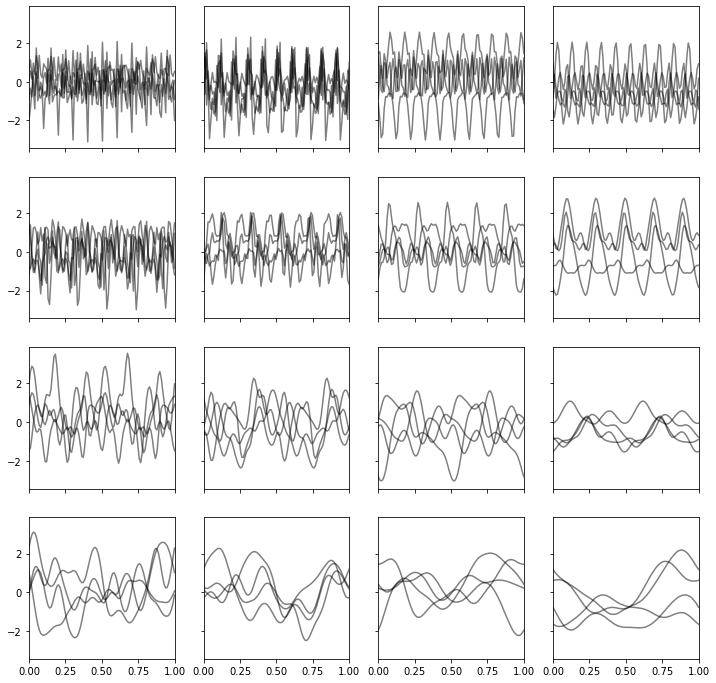

In [10]:
plens = [0.1, 0.2, 0.5, 1.0]
rhos = [0.1, 0.2, 0.5, 1.0]

n_test = 100

x_test = torch.linspace(0, 1, n_test).reshape(-1, 1)
fig, axs = plt.subplots(nrows=len(plens), ncols=len(rhos), sharex=True, sharey=True, figsize=(3*len(plens), 3*len(rhos)))
with torch.no_grad():
    for i, plen in enumerate(plens):
        for j, rho in enumerate(rhos):
            ax = axs[i, j]

            kernel = PeriodicKernel()
            kernel.period_length = plen
            kernel.lengthscale = rho
            K = kernel(x_test, x_test).evaluate()

            try:
                chol = torch.linalg.cholesky(K)
            except RuntimeError:
                K += 1e-5 * torch.eye(n_test)
                chol = torch.linalg.cholesky(K)

            u = torch.randn(n_test, 4)
            samples = torch.zeros(n_test, 4) + chol @ u

            ax.plot(x_test, samples, c='k', alpha=0.5)
            ax.set_xlim(0, 1)

### Формула Матерона

Апостериорный процесс $f | Y$ задается аналитическими матожиданием и ковариационной функцией. Поэтому, казалось бы, легко получать сэмплы (траектории) этого процесса в произвольных точках $X_* := [x_{*1}, \ldots x_{*T}]$:

$$ f(X_*) \sim \mathcal{N}\left(\mu := k(x_*, X)(K_{XX} + \sigma^2 I)^{-1}Y, \quad \Sigma := k(x_*, X) (K_{XX} + \sigma^2 I)^{-1} k(X, x_*) \right) $$

$$ f(X_*) = \mu + \Sigma^{1/2} u, \quad u \sim \mathcal{N}(0, I) $$

Это требует вычисления корня из матрицы $\Sigma$ размера $(T, T)$ (сложность $O(T^3)$ операций). Если $T$ велико, то это фактически невозможно.

Альтернативный способ предоставляет формула Матерона. 

$$ f(x_*) | Y = f(x_*) + (K_{XX} + \sigma^2 I)^{-1}(Y - \varepsilon) $$

Пусть мы умеем каким-то образом эффективно получать траектории априорного процесса $f$ как функции от $x$. Тогда
можно автоматически получать траектории процесcа $f | Y$ как функции от $x$, _корректируя_ априорные сэмплы поправкой, вносимой наблюдаемыми данными.

Для некоторых (стационарных) ядер существует возможность получать аппроксимированные сэмплы с помощью Random Fourier Features. Эта техника основана на теореме Бохнера. В подробности вдаваться не будем.

Вот код, который получает сэмплы по формуле Матерона для RBF-ядра и Matern-{0.5, 1.5, 2.5}:

In [11]:
class PriorSampler(torch.nn.Module):
    def __init__(self, kernel, nsamples=3, nfeatures=1024, device='cpu'):
        super().__init__()        
        self.kernel = kernel
        self.nsamples = nsamples  # s
        self.ndims = 1 if self.kernel.ard_num_dims is None else self.kernel.ard_num_dims  # k
        self.nfeatures = nfeatures   # f
        
        self.device = device
        self._compute_features() 
        
    def _compute_features(self):
        l = 1.0
        
        # generate theta_i ~ psd
        if isinstance(self.kernel, gpytorch.kernels.rbf_kernel.RBFKernel):
            xy = torch.randn((self.nfeatures, self.nsamples, self.ndims), dtype=torch.float64, device=self.device)  # fsk
            theta = torch.transpose(xy / l, -1, 0)  # shape (ksf)

        elif isinstance(self.kernel, gpytorch.kernels.matern_kernel.MaternKernel):
            xy = torch.randn((self.nfeatures, self.nsamples, self.ndims, ), device=self.device)  / l  # sfk
            xy = torch.transpose(xy, 0, -1)  # ksf
            if self.kernel.nu == 1.5:
                chi2 = torch.distributions.chi2.Chi2(torch.tensor([3.0], dtype=torch.float64, device=self.device))
                u = torch.squeeze(chi2.sample((self.nsamples, self.nfeatures,)))  # sf
                theta = xy / torch.sqrt(u / 3)  # ksf
            elif self.kernel.nu == 2.5:
                chi2 = torch.distributions.chi2.Chi2(torch.tensor([5.0], dtype=torch.float64, device=self.device))
                u = torch.squeeze(chi2.sample((self.nsamples, self.nfeatures,)))  # sf
                theta = xy / torch.sqrt(u / 5)  # ksf
            elif self.kernel.nu == 0.5:
                u = torch.randn((self.nsamples, self.nfeatures,), dtype=torch.float64, device=self.device)**2 # u = np.random.chisquare(1, self._n_features)
                theta = xy / torch.sqrt(u)  # ksf

        else:
            raise NotImplementedError

        #generate phi_i ~ U[0, 2pi]
        taurnd = torch.rand((self.nsamples, self.nfeatures), device=self.device)
        tau = 2 * np.pi * taurnd

        #generate w_i ~ N[0, 2/n_features]
        w = (
            torch.sqrt(torch.tensor([2 / self.nfeatures], 
                                    dtype=torch.float64, 
                                    device=self.device)) 
            * torch.randn((self.nsamples, self.nfeatures), device=self.device)
        )
            
        self.theta, self.tau = theta, tau   # ksf
        
        self.w = w

    def sample_f(self, test_X):
        # X_test shape (t, k)
        scalar_product = torch.einsum('tk,ksf->tsf', test_X / self.kernel.lengthscale, self.theta) # shape (t, s, nfeat)
        out = torch.sum(self.w * torch.cos(scalar_product + self.tau[None, ...].clone()), axis=-1)  # ts
        return out

    def forward(self, x):
        """ Compute prior GP in point x """
        sample = self.sample_f(x)
        return sample


### Simple sampler
class MatheronSampler(torch.nn.Module):
    def __init__(self, kernel, likelihood, train_X, train_Y, nsamples=1, nfeatures=1024, device='cpu'):
        super().__init__()
        self.kernel = kernel
        self.likelihood = likelihood
        self.train_X = train_X
        self.train_Y = train_Y
        self.ndims = 1 if self.kernel.ard_num_dims is None else self.kernel.ard_num_dims
        self.nsamples = nsamples        
        self.prior_sampler = PriorSampler(self.kernel, nsamples=nsamples, nfeatures=nfeatures)
      
        self.Kxx = self.kernel(self.train_X, self.train_X).evaluate()
        
        self.residue, self.v = None, None       
        self.update_v()
            
    
    def sample_f(self, test_X):
        """test_X shape [t, k] where t is number of test points, k is dimensionality.

        Compute f*(.) = f(.) + K.x @ Kxx^{-1} (y - f(x) - eps)
        """
        test_train_covar = self.kernel(test_X, self.train_X)  # tx   
        prior_f = self.prior_sampler(test_X)   # ts
        
        update_term = test_train_covar.matmul(self.v)  # ts
        sample = prior_f + update_term        
        return sample

    def update_v(self):
        prior_f_train = self.prior_sampler(self.train_X)  # xs
        self.residue = self.train_Y[..., None] - prior_f_train    
        
        mvn = gpytorch.distributions.MultivariateNormal(torch.zeros(self.train_X.size()[0]), self.Kxx)
        covar_train_train = self.likelihood(mvn, self.train_X).lazy_covariance_matrix
        
        self.v = covar_train_train.inv_matmul(self.residue)   # xs  
        self.Kxx_y = covar_train_train
       
        # self.v = torch.linalg.solve(self.Kxx, self.residue)
    
    def forward(self, x):
        sample = self.sample_f(x)
        return sample

### Иллюстрационная задача

In [12]:
torch.manual_seed(123)

n_train = 20
train_X = torch.rand(n_train, 1).double()
train_Y = torch.sin(2*np.pi*train_X).reshape(-1).double() + torch.sqrt(torch.tensor(1e-2))*torch.randn(n_train)

kernels = [MaternKernel(nu = 1.5), MaternKernel(nu=0.5), PeriodicKernel()]

test_X = torch.linspace(0, 1, 100).double()

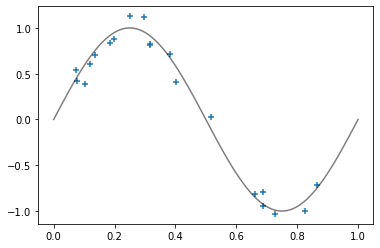

In [13]:
plt.scatter(train_X, train_Y, marker='+')
plt.plot(test_X, torch.sin(2*np.pi*test_X), c='k', alpha=0.5)

In [14]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, kernel, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(kernel)

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [15]:
likelihoods = [gpytorch.likelihoods.GaussianLikelihood() for kernel in kernels]
models = [ExactGPModel(train_X, train_Y, kernel, likelihood) for kernel, likelihood in zip(kernels, likelihoods)]

In [16]:
from tqdm.notebook import tqdm


In [17]:
def trainer(optimizer, model, mll, train_X, train_Y, n_epoch=10):
    
    generator = tqdm(range(n_epoch))
    
    for i in generator:
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_X)
        # Calc loss and backprop gradients
        loss = -mll(output, train_Y)
        loss.backward()
        
        generator.set_postfix({'loss': loss.item(), 
                               'lengthscale':  model.covar_module.base_kernel.lengthscale.item(),
                            'noise': model.likelihood.noise.item()})
        optimizer.step()

In [18]:
for model, likelihood in zip(models, likelihoods):
    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    trainer(optimizer, model, mll, train_X, train_Y, n_epoch=100)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
means, variances = [], []

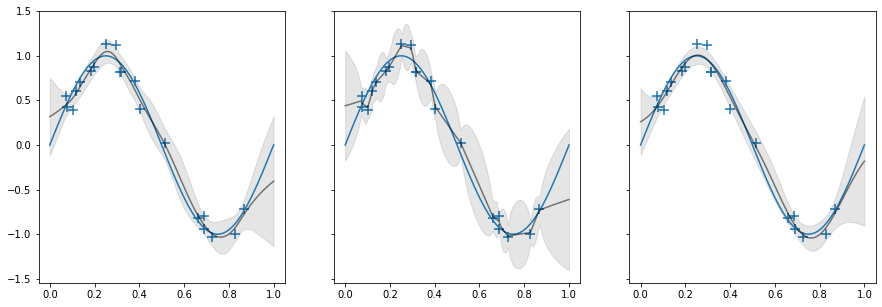

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=len(models), sharey=True, figsize=(5*len(models), 5))
for i, model in enumerate(models):
    model.eval()
    
    with torch.no_grad():
        predictive = model(test_X)
    
    mean, var = predictive.mean, predictive.variance
    means.append(mean)
    variances.append(var)
    
    #_ = plt.plot(test_X, samples, c='k', alpha=0.1)
    ax = axs[i]
    ax.scatter(train_X, train_Y, marker='+', s=100)
    ax.plot(test_X, np.sin(2*np.pi*test_X))
    ax.plot(test_X, mean, c='k', alpha=0.5)
    ax.fill_between(test_X.ravel(), mean + 1.96 * torch.sqrt(var), mean - 1.96 * torch.sqrt(var), alpha=0.1, color='k')

Посмотрим, что происходит за пределами отрезка [0,1]:

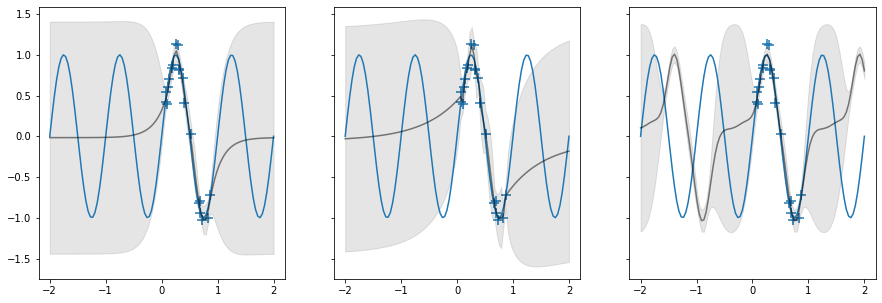

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=len(models), sharey=True, figsize=(5*len(models), 5))

larger_test_X = torch.linspace(-2, 2, 100).reshape(-1, 1).double()

for i, model in enumerate(models):
    model.eval()
    
    with torch.no_grad():
        predictive = model(larger_test_X)
    
    mean, var = predictive.mean, predictive.variance
    means.append(mean)
    variances.append(var)
    
    #_ = plt.plot(test_X, samples, c='k', alpha=0.1)
    ax = axs[i]
    ax.scatter(train_X, train_Y, marker='+', s=100)
    ax.plot(larger_test_X, np.sin(2*np.pi*larger_test_X))
    ax.plot(larger_test_X, mean, c='k', alpha=0.5)
    ax.fill_between(larger_test_X.ravel(), mean + 1.96 * torch.sqrt(var), mean - 1.96 * torch.sqrt(var), alpha=0.1, color='k')

Посмотрим на сэмплы (траектории):

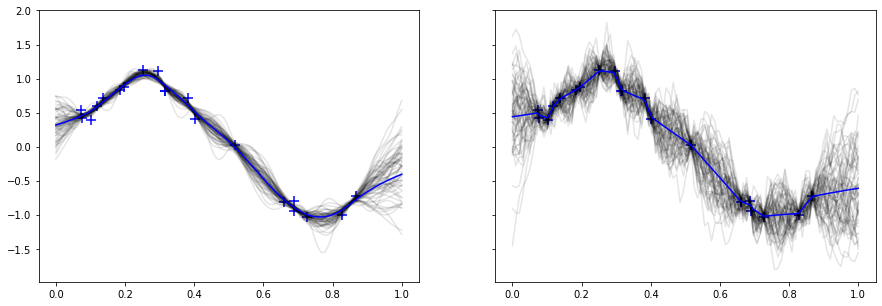

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=len(kernels)-1, sharey=True, figsize=(5*len(models), 5))


for i, kernel in enumerate(kernels[:-1]):
    Y = train_Y - models[i].mean_module(train_X)
    sampler = MatheronSampler(kernel, likelihoods[i], train_X, Y, nsamples=64, nfeatures=1024)

    with torch.no_grad():
        test_X = torch.linspace(0, 1, 100).reshape(-1, 1).double()
        samples = sampler(test_X) + models[i].mean_module(test_X).view(-1, 1)
        
        ax = axs[i]
        ax.plot(test_X, samples, c='k', alpha=0.1)
        ax.scatter(train_X, train_Y, marker='+', s=100, c='b')
        ax.plot(test_X, means[i], c='b')

### Real-world

In [23]:
import pandas as pd

In [24]:
from sklearn.datasets import fetch_openml

co2 = fetch_openml(data_id=41187, as_frame=True)

In [25]:
co2_data = co2.frame
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data = co2_data[["date", "co2"]].set_index("date")
co2_data.head()

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


<AxesSubplot:xlabel='date'>

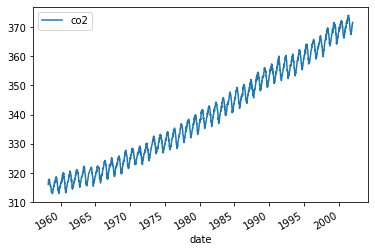

In [26]:
co2_data.plot()

In [27]:
co2_data = co2_data.resample("M").mean().dropna(axis="index", how="any")

<AxesSubplot:xlabel='date'>

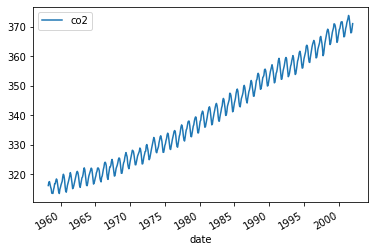

In [28]:
co2_data.plot()

In [29]:
X = (co2_data.index.year + co2_data.index.month / 12).to_numpy().reshape(-1, 1)
y = co2_data["co2"].to_numpy()

In [30]:
train_X = torch.tensor(X[:400])
train_y = torch.tensor(y[:400])

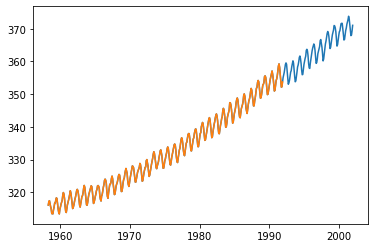

In [31]:
plt.plot(X, y)
plt.plot(train_X, train_y)

Попробуем предсказать уровень CO2 по дате с помошью ГП.

In [32]:
kernel = MaternKernel(nu=2.5)
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, kernel, likelihood)

In [33]:
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

trainer(optimizer, model, mll, train_X, train_y, n_epoch=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [34]:
test_X = torch.tensor(X, requires_grad=False)

In [35]:
model.eval()
    
with torch.no_grad():
    predictive = model(test_X)

    mean, var = predictive.mean, predictive.variance

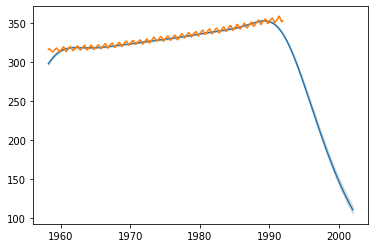

In [36]:
plt.plot(test_X, mean)
plt.plot(train_X, train_y)
plt.fill_between(test_X.ravel(), mean + 1.96 * torch.sqrt(var), mean - 1.96 * torch.sqrt(var), alpha=0.1, color='k')

Ой :(

Попробуем подумать. В данных есть некая краткосрочная периодичность, которая может быть схвачена PeriodicKernel.
Кроме того, есть некий общий тренд, который мы попробуем захватить ядром RBF.

In [37]:
long_term_kernel = RBFKernel()
long_term_kernel.lengthscale = 100   # long term, 100 years
periodic_kernel = PeriodicKernel()
periodic_kernel.period_length = 1   # 1 year
periodic_kernel.lengthscale = 1
kernel = long_term_kernel + periodic_kernel

In [38]:
periodic_kernel

PeriodicKernel(
  (raw_lengthscale_constraint): Positive()
  (raw_period_length_constraint): Positive()
)

In [39]:
class MaunaLoaGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, kernel, likelihood):
        super(MaunaLoaGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = kernel

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [40]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, kernel, likelihood)


In [41]:
def trainer(optimizer, model, mll, train_X, train_Y, n_epoch=10):
    
    generator = tqdm(range(n_epoch))
    
    for i in generator:
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_X)
        # Calc loss and backprop gradients
        loss = -mll(output, train_Y)
        loss.backward()
        
        generator.set_postfix({'loss': loss.item(), 
                            'noise': model.likelihood.noise.item()})
        optimizer.step()

In [42]:
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

trainer(optimizer, model, mll, train_X, train_y, n_epoch=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

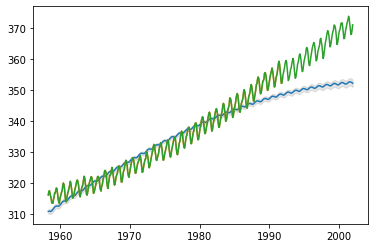

In [43]:
model.eval()
    
with torch.no_grad():
    predictive = model(test_X)

    mean, var = predictive.mean, predictive.variance
    
plt.plot(test_X, mean)
plt.plot(train_X, train_y)
plt.plot(X, y)
plt.fill_between(test_X.ravel(), mean + 1.96 * torch.sqrt(var), mean - 1.96 * torch.sqrt(var), alpha=0.1, color='k')

Уже лучше. Посмотрим на нашу модель:

In [44]:
for param_name, param in model.named_parameters():
    constraint = model.constraint_for_parameter_name(param_name)
    param_value = constraint.transform(param).item() if constraint is not None else param.item()
    print(f'Parameter: {param_name:42}\t\t\t value = {param_value}')

Parameter: likelihood.noise_covar.raw_noise          			 value = 9.845649719238281
Parameter: mean_module.constant                      			 value = 42.547386169433594
Parameter: covar_module.raw_outputscale              			 value = 12.457497596740723
Parameter: covar_module.base_kernel.kernels.0.raw_lengthscale			 value = 63.302879333496094
Parameter: covar_module.base_kernel.kernels.1.raw_lengthscale			 value = 8.968536376953125
Parameter: covar_module.base_kernel.kernels.1.raw_period_length			 value = 1.1138901710510254


Видим, что long_term lengthscale порядка 63 лет, краткосрочный тренд имеет периодичность около 0.7 лет. 

При этом очень высокий уровень шума, попробуем его зафиксировать и вместо этого введем ядро, которое будет отвечать за иррегулярности.

In [62]:
long_term_kernel = RBFKernel()
long_term_kernel.lengthscale = 100   # long term, 100 years

periodic_kernel = PeriodicKernel()
periodic_kernel.period_length = 1   # 1 year
periodic_kernel.lengthscale = 1

periodic_decay_kernel = RBFKernel()
periodic_decay_kernel.lengthscale = 100  # allow long term decay from peridicity

irregularities_kernel = RQKernel()
irregularities_kernel.lengthscale = 1.0
irregularities_kernel.alpha = 1.0

kernel = (
    ScaleKernel(long_term_kernel) 
    + ScaleKernel(periodic_decay_kernel * periodic_kernel) 
    + ScaleKernel(irregularities_kernel)
)

In [47]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = MaunaLoaGPModel(train_X, train_y, kernel, likelihood)

model.likelihood.noise_covar.raw_noise.requires_grad=False

In [48]:
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

trainer(optimizer, model, mll, train_X, train_y, n_epoch=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

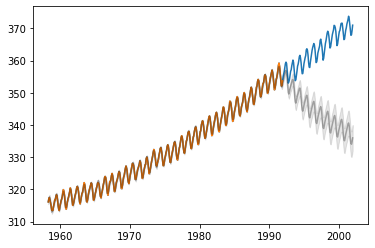

In [49]:
model.eval()
    
with torch.no_grad():
    predictive = model(test_X)

    mean, var = predictive.mean, predictive.variance

plt.plot(X, y)
plt.plot(train_X, train_y)
plt.plot(test_X, mean, c='k', alpha=0.3)


plt.fill_between(test_X.ravel(), mean + 1.96 * torch.sqrt(var), mean - 1.96 * torch.sqrt(var), alpha=0.1, color='k')

Неплохо. Давайте отнормируем данные, чтобы у них были стандартные средние и дисперсии.

In [57]:
torch_X = torch.tensor(X)
torch_y = torch.tensor(y)

train_X = torch.tensor(X[:400])
train_y = torch.tensor(y[:400])

mean_y = torch.mean(train_y)
std_y = torch.std(train_y)

train_y = (train_y - mean_y) / std_y

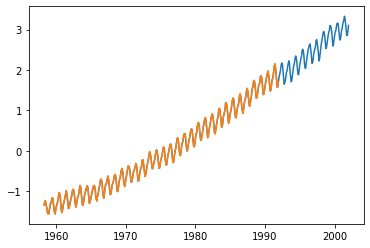

In [58]:
plt.plot(torch_X, (torch_y - mean_y) / std_y)
plt.plot(train_X, train_y)

In [63]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = MaunaLoaGPModel(train_X, train_y, kernel, likelihood)

model.likelihood.noise_covar.raw_noise.requires_grad=False

In [64]:
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

trainer(optimizer, model, mll, train_X, train_y, n_epoch=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

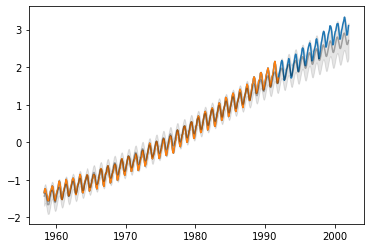

In [65]:
model.eval()
    
with torch.no_grad():
    predictive = model(test_X)

    mean, var = predictive.mean, predictive.variance

plt.plot(torch_X, (torch_y - mean_y) / std_y)
plt.plot(train_X, train_y)
plt.plot(test_X, mean, c='k', alpha=0.3)


plt.fill_between(test_X.ravel(), mean + 1.96 * torch.sqrt(var), mean - 1.96 * torch.sqrt(var), alpha=0.1, color='k')

Уже что-то похожее на то, что мы хотим видеть.

Попробуйте улучшить модель. Например, убрав "лишние" ядра и/или добавив какие-то свои.

У ребят из sklearn это получилось: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html